In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Data type of the features
* Diagnosis- it is Nominal Scale
* Rest are the ratio scales 

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Checking the missing values
* As we can see there is no missing value excepet the one feature i.e. "Unnamed: 32". In this column all the row value are missing

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Dropping the columns 
* Unnecessary feature is going to be dropped 
* As it can be seen that "Unnamed: 32" is unwanted columns which is dropped

In [8]:
df=df.drop('Unnamed: 32', axis=1)

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

from scipy.stats import pearsonr


In [10]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['radius_mean'], df['texture_mean'])
print('Pearsons correlation: %.3f' % corr)



Pearsons correlation: 0.324


In [11]:
cols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

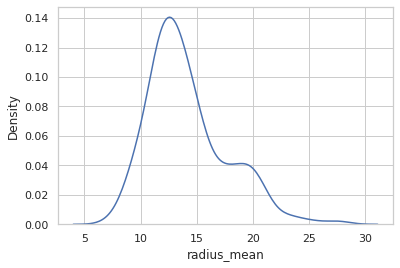

In [12]:
sns.kdeplot(df['radius_mean'])


<AxesSubplot:xlabel='texture_mean', ylabel='Density'>

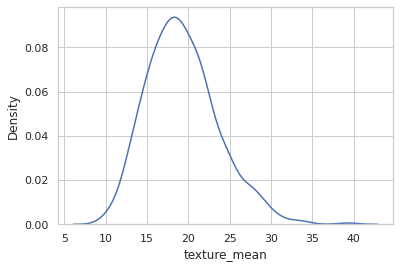

In [13]:
sns.kdeplot(df['texture_mean'])

<AxesSubplot:xlabel='perimeter_mean', ylabel='Density'>

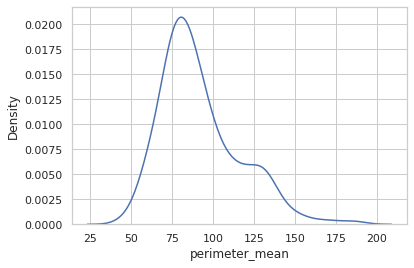

In [14]:
sns.kdeplot(df['perimeter_mean'])

<AxesSubplot:xlabel='area_mean', ylabel='Density'>

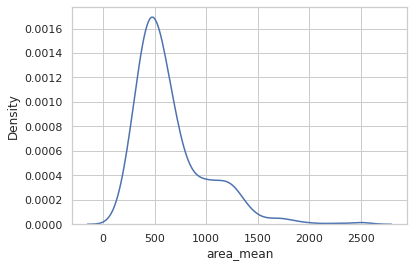

In [15]:
sns.kdeplot(df['area_mean'])

<AxesSubplot:xlabel='fractal_dimension_mean', ylabel='Density'>

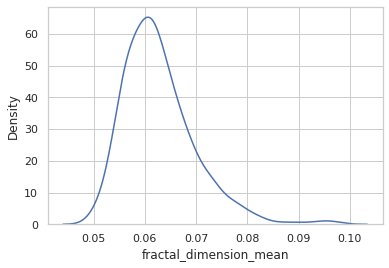

In [16]:
sns.kdeplot(df['fractal_dimension_mean'])

# Conclusion
* The features in dataset are almost normaly distributed 
* Now as per the assumption we can se the pearson's correlation coefficient and other correlation coeffiecient 

# Pearson's Correlation Coefficient 
* Correlation refers to the association between the observed values of two variables
* Correlation quantifies this association, often as a measure between the values -1 to 1 for perfectly negatively correlated and perfectly positively correlated. The calculated correlation is referred to as the “correlation coefficient.
* The correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson’s correlation
* This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.

# Spearman’s Rank Correlation
* t may also be called Spearman’s correlation coefficient and is denoted by the lowercase greek letter rho (p)
* This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship
* As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0)
*

In [17]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr


In [18]:
coef, p = spearmanr(df['radius_mean'], df['texture_mean'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.341
Samples are correlated (reject H0) p=0.000


In [19]:
coef, p = pearsonr(df['radius_mean'], df['texture_mean'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Pearson correlation coefficient: 0.324
Samples are correlated (reject H0) p=0.000


In [20]:
df[['radius_mean', 'texture_mean']].corr()

,radius_mean,texture_mean
radius_mean,1.000000,0.323782
texture_mean,0.323782,1.000000


# Kendall’s Rank Correlation
* coefficient is often referred to by the lowercase Greek letter tau (t)
* The intuition for the test is that it calculates a normalized score for the number of matching or concordant rankings between the two samples
* the test is also referred to as Kendall’s concordance test.

In [21]:
from scipy.stats import kendalltau

In [22]:
coef, p = kendalltau(df['radius_mean'], df['texture_mean'])
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.229
Samples are correlated (reject H0) p=0.000


In [23]:
def pearson_r(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    cov_est = np.sum((x - x_bar) * (y - y_bar))
    std_x_est = np.sqrt(np.sum((x - x_bar)**2))
    std_y_est = np.sqrt(np.sum((y - y_bar)**2))
    return cov_est / (std_x_est * std_y_est)

In [24]:
pearson_r(df['radius_mean'], df['texture_mean'])

0.32378189092773313

In [25]:
from scipy.stats import rankdata
def spearmans_correlation_coefficient(X, Y):
    rX, rY = rankdata(X), rankdata(Y)
    return pearson_r(rX, rY)

In [26]:
spearmans_correlation_coefficient(df['radius_mean'], df['texture_mean'])

0.3409562685372812

# Jointplot-  
* Great way to visualize the individuals distributions and joint distribution as well

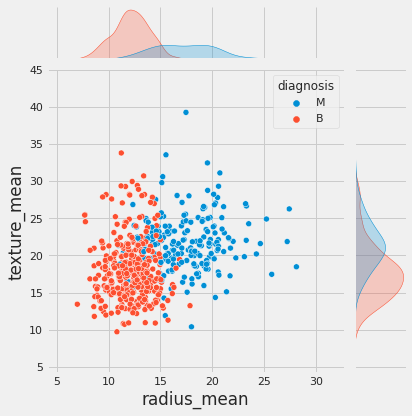

In [27]:
plt.style.use('fivethirtyeight')

sns.jointplot(x=df['radius_mean'], y=df['texture_mean'], hue=df['diagnosis'])

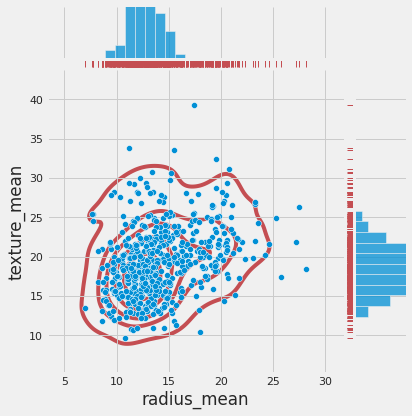

In [28]:
g = sns.jointplot(data=df, x=df['radius_mean'], y=df['texture_mean'])
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

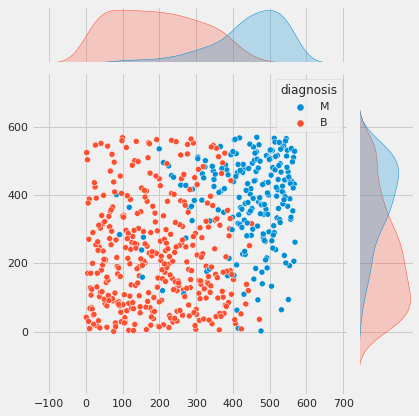

In [29]:
sns.jointplot(x=rankdata(df['radius_mean']), y=rankdata(df['texture_mean']), hue=df['diagnosis'])

In [30]:
def joint_plot(X, Y, z):
    sns.jointplot(x=X, y=Y, hue=z)
    print("Pearson's correlation:-",pearson_r(X,Y))
    print("Spearman coefficient:-",spearmans_correlation_coefficient(X,Y))

Pearson's correlation:- 0.32378189092773313
Spearman coefficient:- 0.3409562685372812


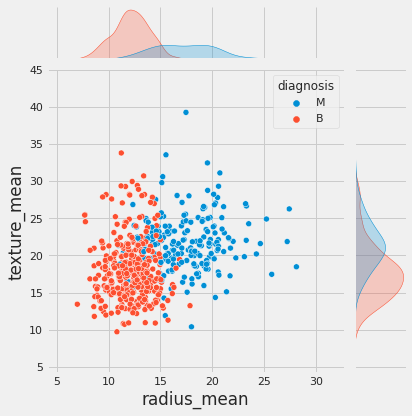

In [31]:
joint_plot(df['radius_mean'], df['texture_mean'], df['diagnosis'])

In [32]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Pearson's correlation:- 0.9978552814938109
Spearman coefficient:- 0.9978017394617468


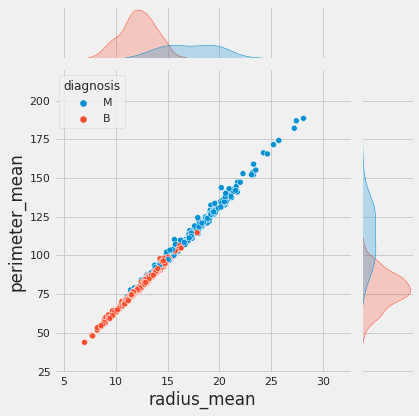

In [33]:
joint_plot(df['radius_mean'], df['perimeter_mean'], df['diagnosis'])

Pearson's correlation:- 0.9873571700566123
Spearman coefficient:- 0.9996020278067482


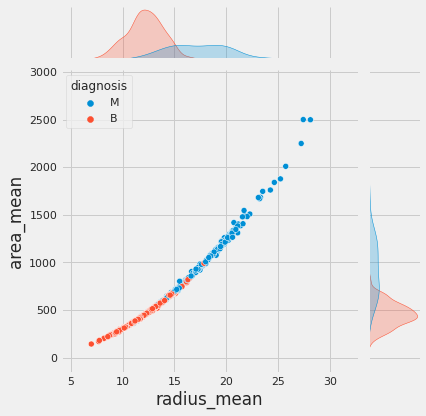

In [34]:
joint_plot(df['radius_mean'], df['area_mean'], df['diagnosis'])

* Similarly we plot for all the features and come out of the best analysis.
* Like wwise we ll find out the correlation coeffiecient value 


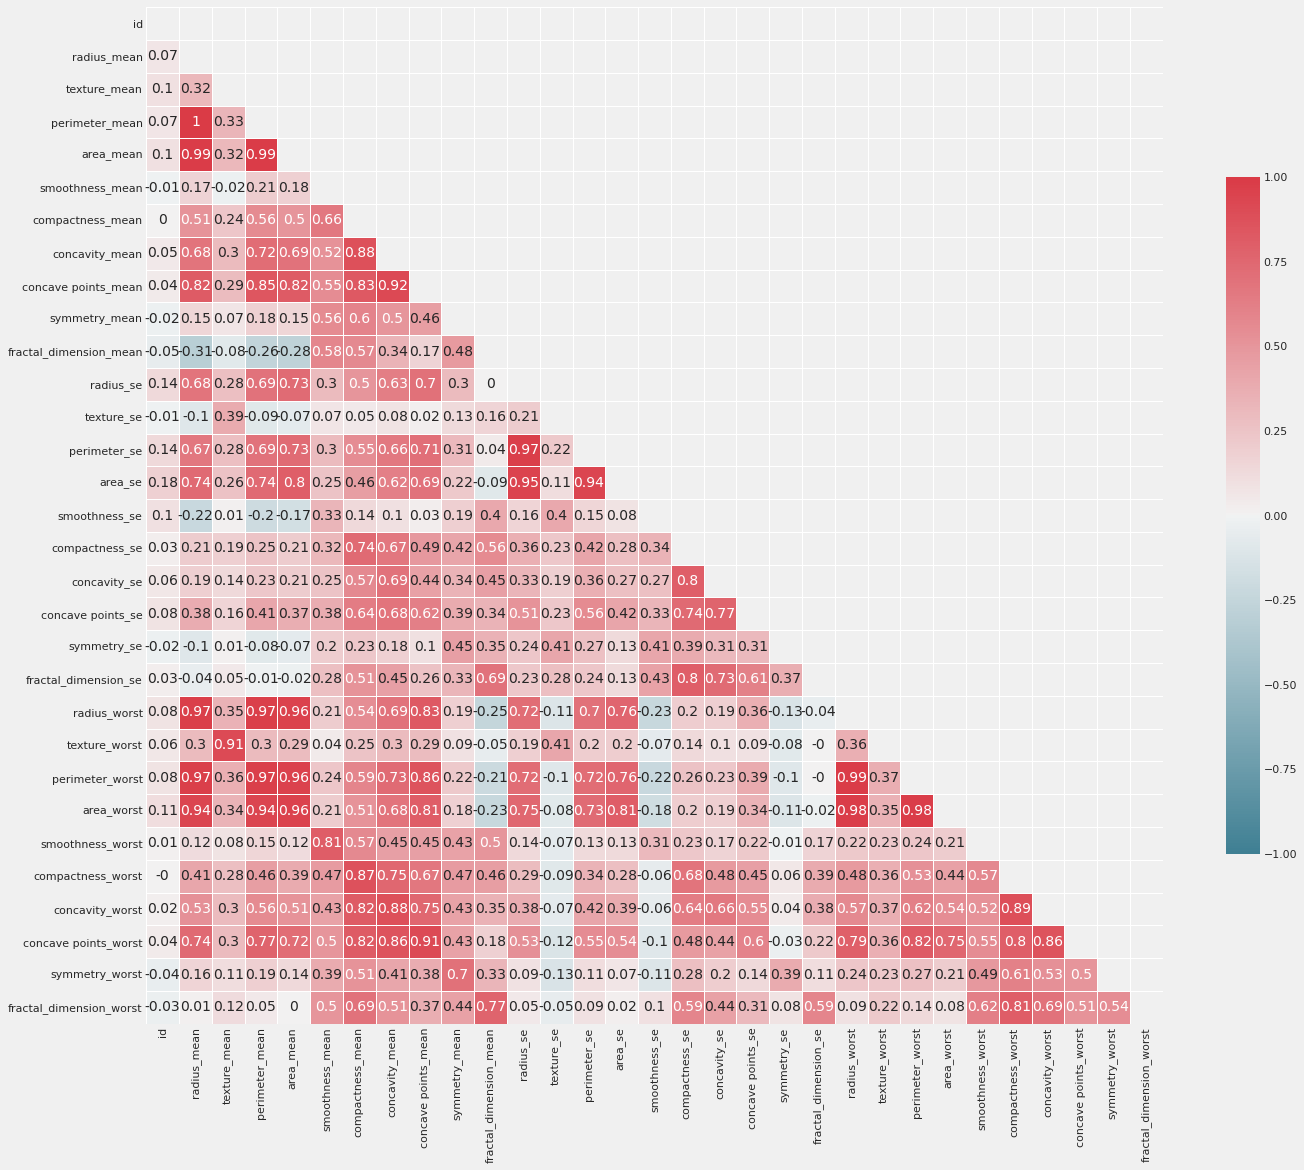

In [35]:
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()